# AKPIK Datathon 2023

Welcome to our Datathon! This Jupyter notebook loads the data for you and takes out a prior evaluation of your solutions. You can also study the data and build your solutions inside this notebook.

**The data** consists of tiny grayscale images (28x28 pixels), which need to be classified into 10 classes. Below, we will take a look at some of these images.

**Your goal** is to find those 10k training examples, from which the best classifier can be trained. The classifier is a fixed 3-layer neural network that is already implemented below. You are given a large pool of training data to select your 10k examples from. You are also given the features of the test set, but not the corresponding labels! Can you figure out the best training examples?

## Basics: data loading and evaluation

The following code implements our evaluation and downloads the data.

In [1]:
import numpy as np
import tensorflow as tf

def evaluate(X_trn, y_trn, X_val, y_val, n_trials=10):
    """Evaluate the fixed model with given training and validation sets.
    
    The final evaluation pipeline of the Datathon is based on precisely the same function,
    but employs the true testing data (X_tst, y_tst), of which the labels y_tst remain
    undisclosed to you."""
    print("Evaluating the model...")
    performances = np.zeros(n_trials)
    for i in range(n_trials): # evaluate the training procedure 10 times
        model = tf.keras.Sequential([ # we use a simple, fully-connected, 3-layer neural network
            tf.keras.layers.Flatten(input_shape=(28, 28)), # inputs have 28x28 pixels
            tf.keras.layers.Dense(256, activation="relu"), # ReLU activation with 256 hidden units
            tf.keras.layers.Dense(10) # the output are 10 class probabilities
        ])
        model.compile( # we will optimize for accuracy, using the standard ADAM optimizer
            optimizer = "adam",
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics = ["accuracy"]
        )
        model.fit(X_trn, y_trn, epochs=10, validation_split=.1, verbose=0) # train the neural network
        performances[i] = model.evaluate(X_val, y_val, verbose=0)[1] # evaluate the neural network
        print(f"Testing accuracy [{i+1:02d}/{len(performances)}]: {performances[i]}")
    print("Average accuracy:", np.mean(performances), "+-", np.std(performances))

def download_data():
    """Download the training features, the training labels, and the testing features."""
    import os
    import urllib.request
    for data_path in ["X_trn.npy", "y_trn.npy", "X_tst.npy"]:
        if not os.path.isfile(data_path):
            url = "https://tu-dortmund.sciebo.de/s/7Bespy29gx955hQ/download?files=" + data_path
            print(f"Downloading {data_path} from {url}")
            urllib.request.urlretrieve(url, data_path)
    print("All data is available now.")

download_data() # execute the function that downloads the data

All data is available now.


## A simple baseline solution

How well would a random selection of 10k training examples work? The following code loads the data, selects the first 10k examples from the training pool, and evaluates this selection on the remaining data. It also stores this solution in a file - you should do the same with your solutions, to send them to the organizers of this Datathon for the final evaluation.

In [2]:
print("Loading the data...")
X_trn = np.load("X_trn.npy") # this is a numpy matrix of the training features
y_trn = np.load("y_trn.npy") # this is a numpy array of the training labels
X_tst = np.load("X_tst.npy") # this is a numpy matrix of the testing features

# baseline: select the first 10k examples
i_trn = np.arange(10_000)

# use all remaining data for validation
#
# hint: which data might be the most appropriate for validation?
i_val = np.arange(10_000, len(y_trn))

# evaluate the baseline
evaluate(
    X_trn[i_trn], y_trn[i_trn], # use the first 10k examples for training...
    X_trn[i_val], y_trn[i_val] # ...and all remaining examples for validation.
)

# store your solution in a file that you can send to the organizers!
np.save("solution_N_of_team_XYZ.npy", i_trn) # always use this technique to store your solution

Loading the data...
Testing accuracy [01/10]: 0.5729210376739502
Testing accuracy [02/10]: 0.6246578693389893
Testing accuracy [03/10]: 0.6372894644737244
Testing accuracy [04/10]: 0.6049736738204956
Testing accuracy [05/10]: 0.570578932762146
Testing accuracy [06/10]: 0.5371842384338379
Testing accuracy [07/10]: 0.5365263223648071
Testing accuracy [08/10]: 0.6479736566543579
Testing accuracy [09/10]: 0.538605272769928
Testing accuracy [10/10]: 0.6383157968521118
Average accuracy: 0.5909026265144348 +- 0.04278797923902295


Almost 60% of accuracy does not seem too bad for a 10-class classification task (random guessing instead of machine learning would only give us about 10% of accuracy here).

However, you will find that this simple baseline will only achieve an accuracy of 42.5% on the actual testing set. Can you find out why the performance drops?

## Taking a look at the data

You can use any tool you like to select your 10k training instances. Your first step in this process, however, should be to take a look at what the data represents. The following code plots the first 25 images of the training data with their labels.

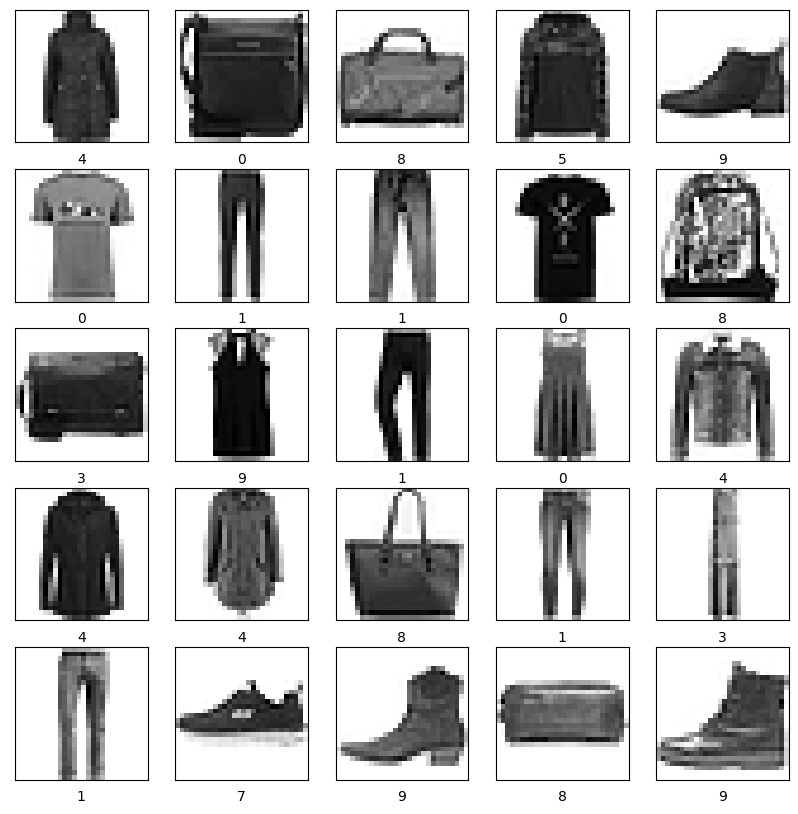

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_trn[i], cmap=plt.cm.binary)
    plt.xlabel(y_trn[i])
plt.show()

Looks like fashion! Let's also check what the class labels might represent. The following code plots the first 10 instances of class `9`.

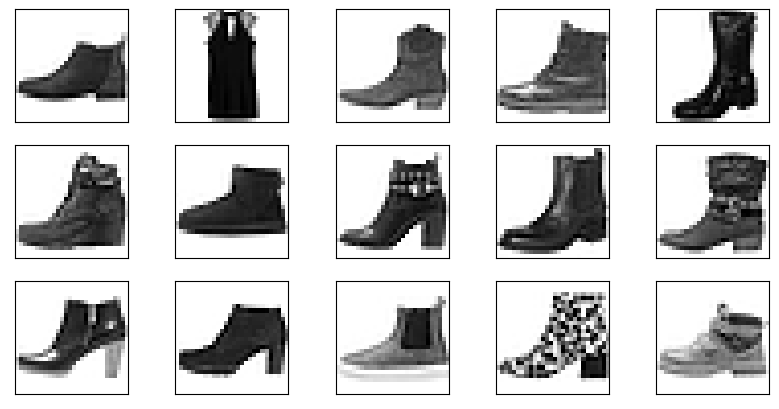

In [8]:
X_9 = X_trn[y_trn == 9] # select all instances of class 9

plt.figure(figsize=(10,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_9[i], cmap=plt.cm.binary)
plt.show()

Most of these examples are boots!

It is now your goal to find out, which training examples are best suited to train a machine learning model that performs well on the testing data `(X_tst, y_tst)`, without knowing `y_tst`.

Good luck!

In [ ]:
# proceed with any code you like
